In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Uploading kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Accessing dataset from kaggle directly
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d unsdsn/world-happiness

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 61.8MB/s]


In [4]:
# Extracting the csv
!unzip world-happiness.zip
!rm -rf world-happiness.zip

Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [5]:
df = pd.read_csv("2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


Text(0, 0.5, 'Score')

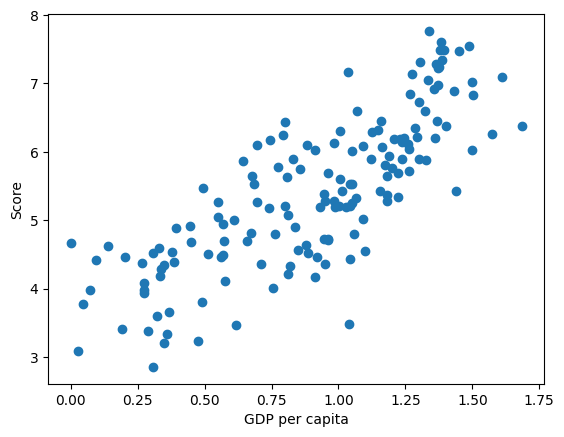

In [10]:
plt.scatter(df['GDP per capita'], df['Score'])
plt.xlabel('GDP per capita')
plt.ylabel('Score')

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['GDP per capita','Score']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [17]:
df['cluster'] = y_predicted
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


In [18]:
km.cluster_centers_

array([[1.04060294, 5.73636765],
       [0.53678333, 4.26911667],
       [1.36553571, 7.04596429]])

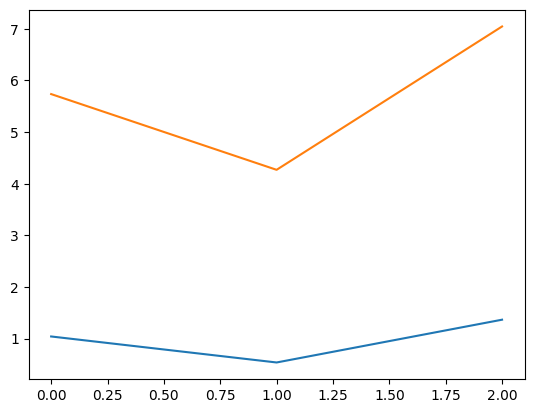

In [19]:
plt.plot(km.cluster_centers_)

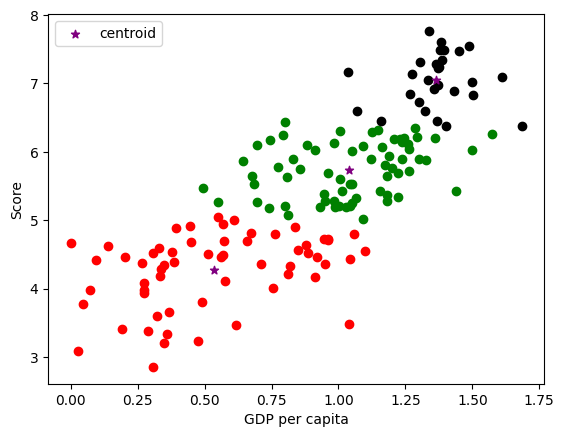

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['GDP per capita'], df1['Score'], color='green')
plt.scatter(df2['GDP per capita'], df2['Score'],color='red')
plt.scatter(df3['GDP per capita'], df3['Score'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.legend()

In [22]:
scaler = MinMaxScaler()

scaler.fit(df[['Score']])
df['Score'] = scaler.transform(df[['Score']])

scaler.fit(df[['GDP per capita']])
df['GDP per capita'] = scaler.transform(df[['GDP per capita']])

In [23]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,1.000000,0.795724,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,0.965622,0.821259,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,0.956265,0.883610,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,0.944060,0.819477,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,0.942840,0.828979,1.522,0.999,0.557,0.322,0.298,2


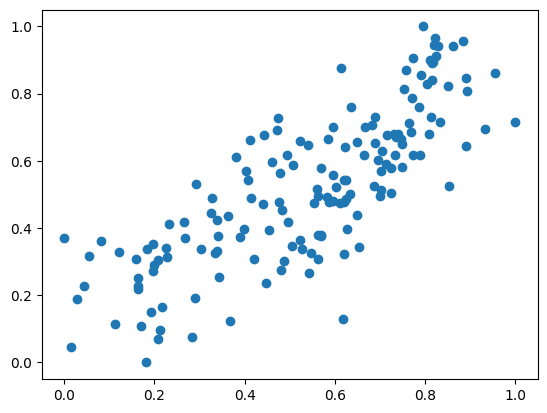

In [24]:
plt.scatter(df['GDP per capita'], df['Score'])

In [25]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['GDP per capita', 'Score']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [26]:
df['cluster'] = y_predicted
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,1.000000,0.795724,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,0.965622,0.821259,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,0.956265,0.883610,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,0.944060,0.819477,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,0.942840,0.828979,1.522,0.999,0.557,0.322,0.298,0


In [27]:
km.cluster_centers_

array([[0.7773599 , 0.75395911],
       [0.20382615, 0.24936776],
       [0.52816554, 0.47860049]])

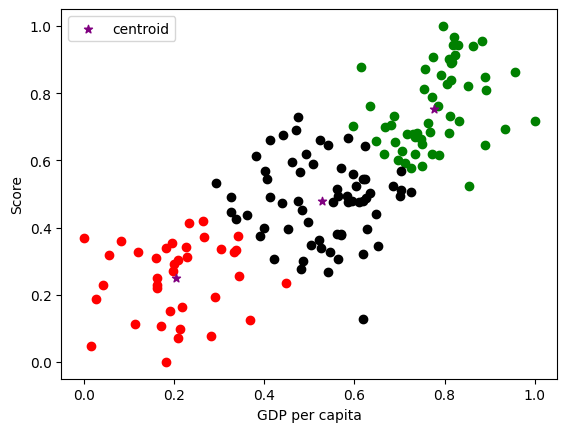

In [28]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['GDP per capita'], df1['Score'], color='green')
plt.scatter(df2['GDP per capita'], df2['Score'],color='red')
plt.scatter(df3['GDP per capita'], df3['Score'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.legend()

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['GDP per capita', 'Score']])
    sse.append(km.inertia_)

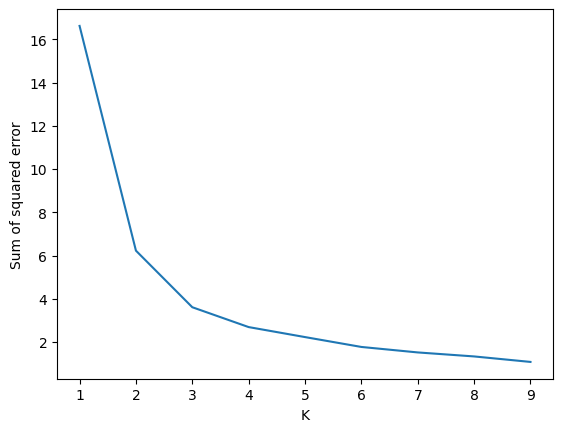

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)